# Tim 2

```
Ryan Gading Abdullah,6025251052
Muhammad Zuama Al Amin,6025251004
Kadek Aldi Kusuma,6025251035
```

## ✅ Daftar Variabel dengan Nilai Ambang Batas (Standar WHO)

| Variabel | Nama Lengkap | Satuan Umum | Ambang Batas WHO (2021) | Keterangan |
|----------|--------------|-------------|--------------------------|------------|
| **PM25** | Particulate Matter ≤ 2.5 µm | µg/m³ | **Rata-rata 24 jam: 15 µg/m³**<br>**Rata-rata tahunan: 5 µg/m³** | Paparan jangka pendek & panjang terkait gangguan pernapasan, jantung, dan stres mental. |
| **PM10** | Particulate Matter ≤ 10 µm | µg/m³ | **Rata-rata 24 jam: 45 µg/m³**<br>**Rata-rata tahunan: 15 µg/m³** | Partikel lebih besar, tapi tetap berbahaya jika terhirup. |
| **PM1** | Particulate Matter ≤ 1 µm | µg/m³ | *Tidak ada standar WHO resmi* | Lebih kecil dari PM2.5, sering dianggap bagian dari PM2.5. Beberapa studi menggunakan 10 µg/m³ sebagai referensi. |
| **NO2** | Nitrogen Dioxide | µg/m³ | **Rata-rata tahunan: 10 µg/m³**<br>**Rata-rata 1 jam: 25 µg/m³** | Gas dari kendaraan bermotor, dikaitkan dengan inflamasi saluran napas dan stres oksidatif. |
| **CO** | Carbon Monoxide | mg/m³ atau ppm | **Rata-rata 8 jam: 2 mg/m³ (≈ 1.7 ppm)**<br>**Rata-rata 1 jam: 4 mg/m³ (≈ 3.4 ppm)** | Mengurangi kapasitas darah membawa oksigen. Efek akut pada konsentrasi tinggi. |
| **Noise** | Kebisingan Lingkungan | dB(A) | **Siang hari (area perumahan): 55 dB**<br>**Malam hari: 40 dB**<br>**>70 dB: berisiko gangguan pendengaran** | Kebisingan >55 dB di siang hari dianggap mengganggu kenyamanan dan memicu stres kronis. |

---

## ❌ Variabel Tanpa Nilai Ambang Batas Baku

Variabel berikut **tidak memiliki standar ambang batas universal** karena bersifat **fisiologis/individual** atau **subjektif**:

| Variabel | Alasan Tidak Ada Ambang Baku |
|----------|------------------------------|
| **IBI** (Inter-Beat Interval) | Sangat bervariasi per individu, usia, kondisi fisik. Diukur sebagai perubahan relatif. |
| **HR** (Heart Rate) | Normal 60-100 bpm untuk dewasa, tapi bisa berbeda tergantung aktivitas, kebugaran, emosi. |
| **EDA** (Electrodermal Activity) | Tidak ada satuan atau nilai “normal” — digunakan untuk mendeteksi peningkatan relatif (stres/terangsang). |
| **BVP** (Blood Volume Pulse) | Digunakan untuk menghitung HR/HRV, bukan nilai absolut. |
| **Label** | Skala persepsi emosi subjektif (1-5) yang dibuat peneliti — tidak ada standar eksternal. |
| **NH3** (Ammonia) | Tidak diatur untuk kualitas udara ambient perkotaan. Standar ada untuk industri/pertanian (misal: 25 ppm OSHA). |



## Import Library

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.impute import SimpleImputer
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

## Import Data

In [3]:
# from google.colab import drive
# drive.mount('/content/drive')

In [4]:
# CSV file path in Google Drive
# file_path = '/content/drive/MyDrive/Dataset/DigitalExposome Dataset.csv'
file_path = 'DigitalExposome Dataset.csv'
# Load dataset using Pandas
df = pd.read_csv(file_path)

# Display the top 5 rows of the dataset
df.head()

,IBI,HR,NO2,Noise,NH3,PM10,CO,PM25,Label,PM1,EDA,BVP
0,0.0,0.377574,0.0,0.511358,0.003018,0.003091,0.871758,0.000000,5,0.000000,0.0,0.0
1,0.0,0.196398,0.0,0.490903,0.003018,0.003091,0.876848,0.003091,5,0.001854,0.0,0.0
2,0.0,0.454163,0.0,0.470449,0.006036,0.006181,0.881939,0.006181,5,0.003709,0.0,0.0
3,0.0,0.322451,0.0,0.449995,0.009055,0.009272,0.887030,0.009272,5,0.005563,0.0,0.0
4,0.0,0.237595,0.0,0.429540,0.012073,0.012362,0.892121,0.012362,5,0.007417,0.0,0.0


In [5]:
df.describe()

,IBI,HR,NO2,Noise,NH3,PM10,CO,PM25,Label,PM1,EDA,BVP
count,42436.000000,42436.000000,42436.000000,42436.000000,42436.000000,42436.000000,42436.000000,42436.000000,42436.000000,42436.000000,42436.000000,42436.000000
mean,0.178688,0.530687,0.502239,0.427541,0.564276,0.208474,0.679874,0.224901,3.326185,0.230773,0.260318,0.482902
std,0.230127,0.266531,0.274914,0.247601,0.294515,0.210981,0.308111,0.223242,1.599863,0.255253,0.221725,0.175569
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,0.000000,0.309505,0.285412,0.214008,0.305285,0.017624,0.458047,0.012362,2.000000,0.006310,0.060686,0.449963
50%,0.016760,0.491213,0.489703,0.403671,0.644756,0.158454,0.805352,0.176150,4.000000,0.176316,0.216064,0.512280
75%,0.309984,0.776388,0.736983,0.618592,0.826943,0.326889,0.909832,0.376813,5.000000,0.407268,0.421109,0.579756
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5.000000,1.000000,5.000000,24.000000,1.000000,1.000000


In [6]:
print("Shape:", df.shape)
print("Columns:", df.columns)

Shape: (42436, 12)
Columns: Index(['IBI', 'HR', 'NO2', 'Noise', 'NH3', 'PM10', 'CO', 'PM25', 'Label',
       'PM1', 'EDA', 'BVP'],
      dtype='object')


## Check Data

### Check Data Type

In [7]:
print("\nData Types:")
df.info()


Data Types:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42436 entries, 0 to 42435
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   IBI     42436 non-null  float64
 1   HR      42436 non-null  float64
 2   NO2     42436 non-null  float64
 3   Noise   42436 non-null  float64
 4   NH3     42436 non-null  float64
 5   PM10    42436 non-null  float64
 6   CO      42436 non-null  float64
 7   PM25    42436 non-null  float64
 8   Label   42436 non-null  int64  
 9   PM1     42436 non-null  float64
 10  EDA     42436 non-null  float64
 11  BVP     42436 non-null  float64
dtypes: float64(11), int64(1)
memory usage: 3.9 MB


### Check Missing Value

In [8]:
df.isnull().sum()

IBI      0
HR       0
NO2      0
Noise    0
NH3      0
PM10     0
CO       0
PM25     0
Label    0
PM1      0
EDA      0
BVP      0
dtype: int64

### Check duplicate data

In [9]:
df.duplicated().sum()

14342

### Check Data NaN

In [10]:
df.isna().sum()

IBI      0
HR       0
NO2      0
Noise    0
NH3      0
PM10     0
CO       0
PM25     0
Label    0
PM1      0
EDA      0
BVP      0
dtype: int64

### Preprocessing Data

In [11]:
df

,IBI,HR,NO2,Noise,NH3,PM10,CO,PM25,Label,PM1,EDA,BVP
0,0.000000,0.377574,0.000000,0.511358,0.003018,0.003091,0.871758,0.000000,5,0.000000,0.000000,0.000000
1,0.000000,0.196398,0.000000,0.490903,0.003018,0.003091,0.876848,0.003091,5,0.001854,0.000000,0.000000
2,0.000000,0.454163,0.000000,0.470449,0.006036,0.006181,0.881939,0.006181,5,0.003709,0.000000,0.000000
3,0.000000,0.322451,0.000000,0.449995,0.009055,0.009272,0.887030,0.009272,5,0.005563,0.000000,0.000000
4,0.000000,0.237595,0.000000,0.429540,0.012073,0.012362,0.892121,0.012362,5,0.007417,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
42431,0.404367,0.760390,0.628667,0.017519,0.469688,0.000000,0.072343,0.000000,5,0.000000,0.909825,0.422467
42432,0.421340,0.759114,0.618835,0.013139,0.455664,0.000000,0.054257,0.000000,5,0.000000,0.903446,0.502445
42433,0.438314,0.758021,0.609004,0.008760,0.441640,0.000000,0.036172,0.000000,5,0.000000,0.824801,0.352692
42434,0.455287,0.757291,0.599172,0.004380,0.427616,0.000000,0.018086,0.000000,5,0.000000,0.856681,0.449382


In [12]:
df.shape

(42436, 12)


📊 Boxplot Sebelum Outlier Removal


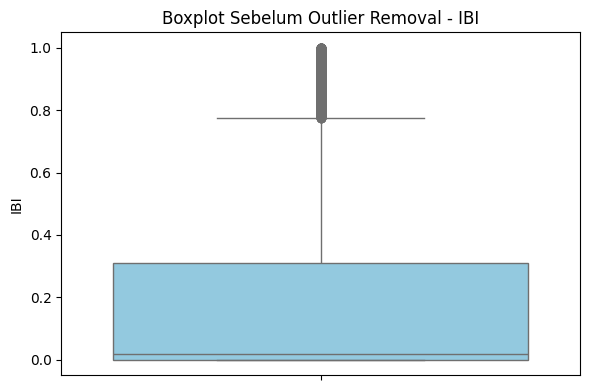

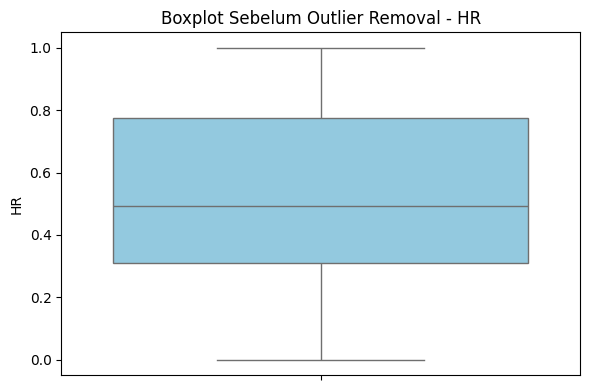

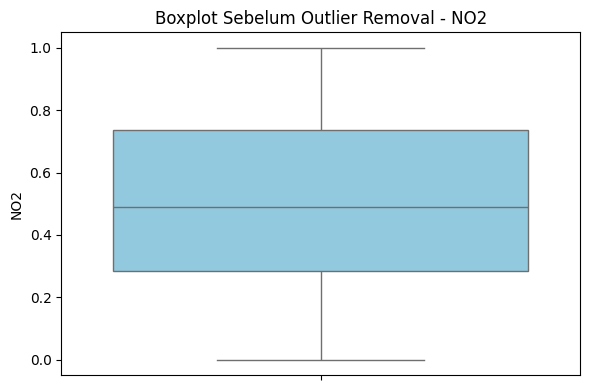

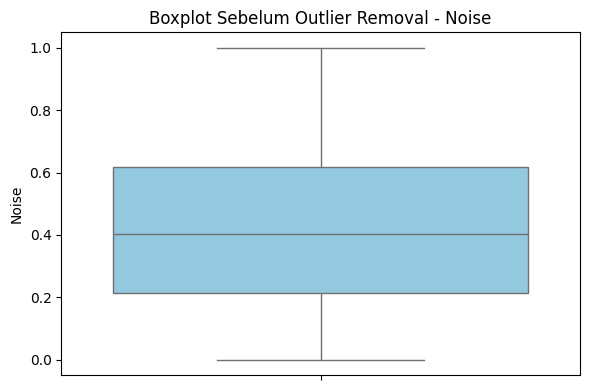

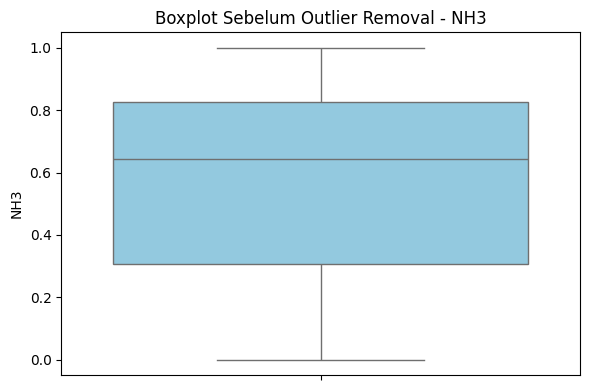

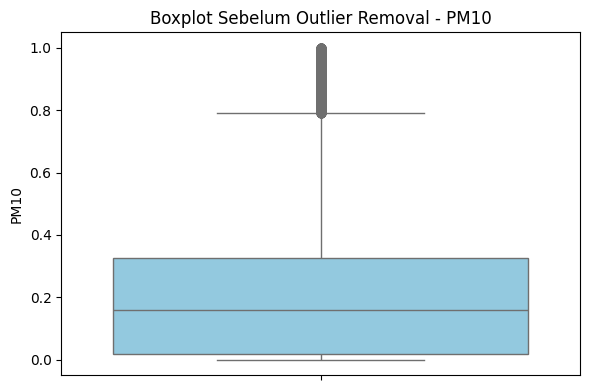

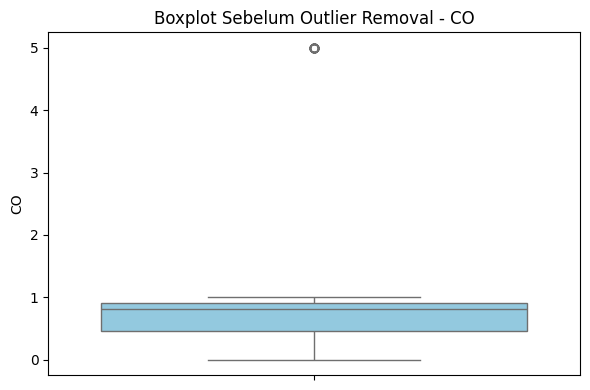

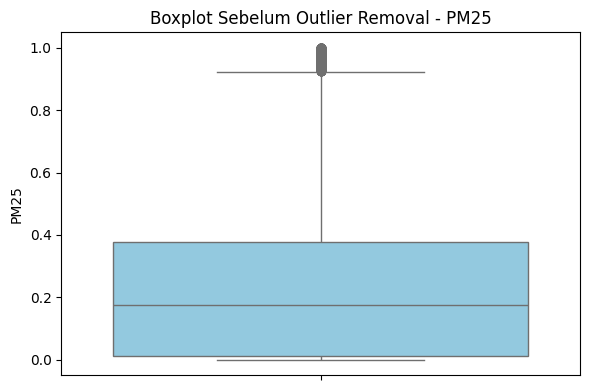

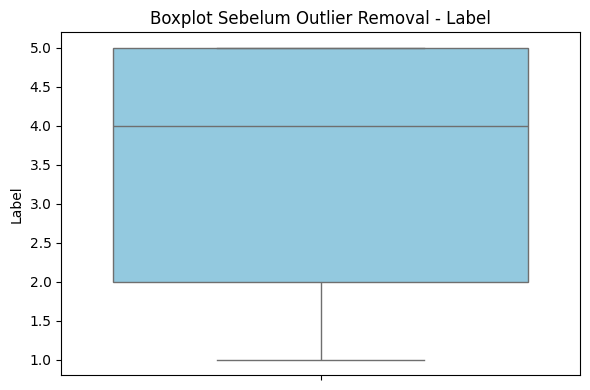

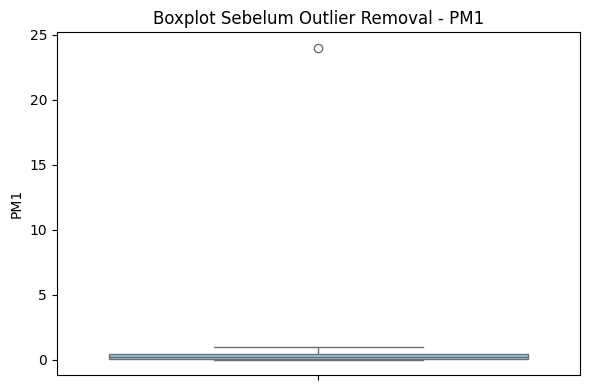

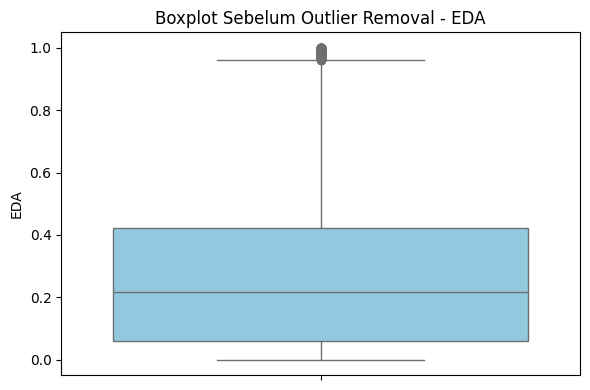

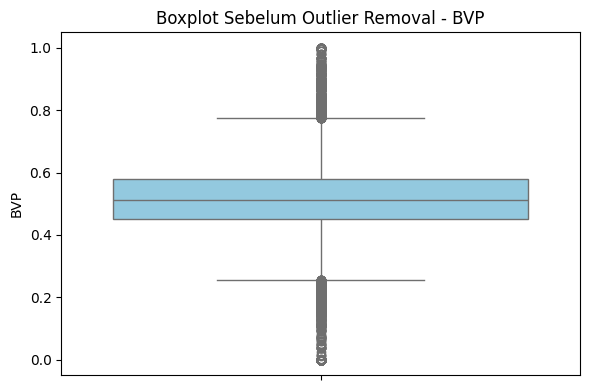

In [13]:
# Simpan salinan data sebelum outlier removal (untuk visualisasi)
df_before_outlier = df.copy()

# # Boxplot sebelum outlier removal
# plt.figure(figsize=(15, 8))
# sns.boxplot(data=df_before_outlier[numeric_cols])
# plt.xticks(rotation=90)
# plt.title("Boxplot Sebelum Outlier Removal")
# plt.show()
print("\n📊 Boxplot Sebelum Outlier Removal")
for col in df:
    plt.figure(figsize=(6, 4))
    sns.boxplot(y=df_before_outlier[col], color='skyblue')
    plt.title(f"Boxplot Sebelum Outlier Removal - {col}")
    plt.tight_layout()
    plt.show()

In [14]:
### Outlier Detection and Removal using Z-score
z_scores = np.abs(stats.zscore(df))
df = df[(z_scores < 3).all(axis=1)]  # Keep only rows where all Z-scores < 3

In [15]:
print("Shape after removing outliers:", df.shape)

Shape after removing outliers: (41189, 12)



📊 Boxplot Setelah Outlier Removal


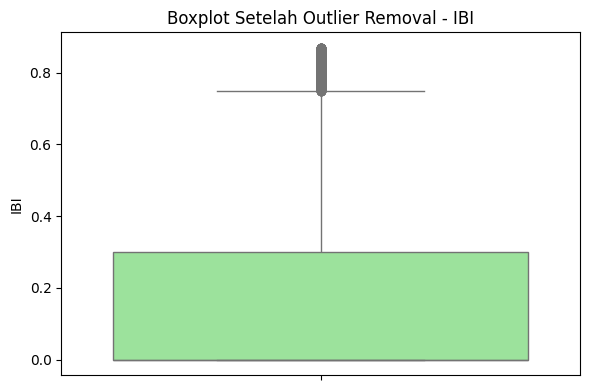

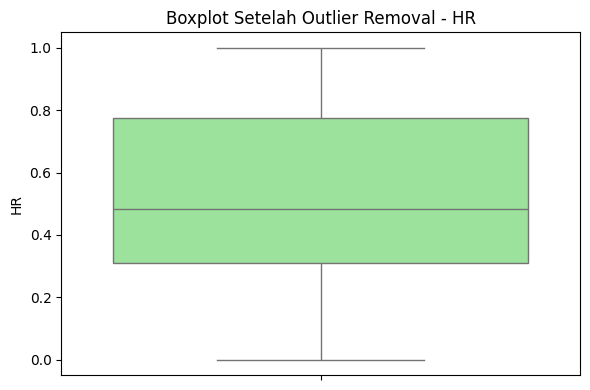

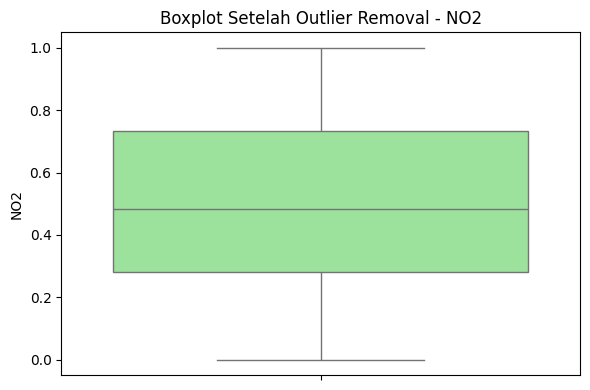

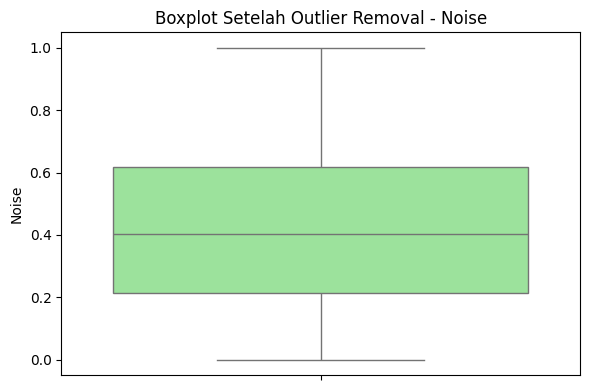

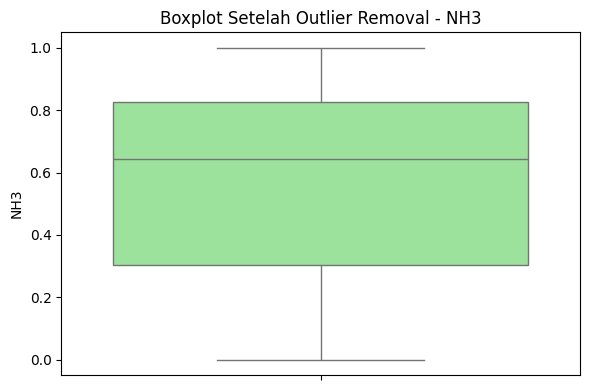

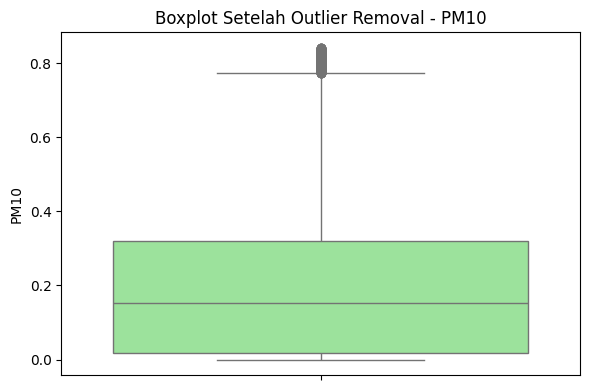

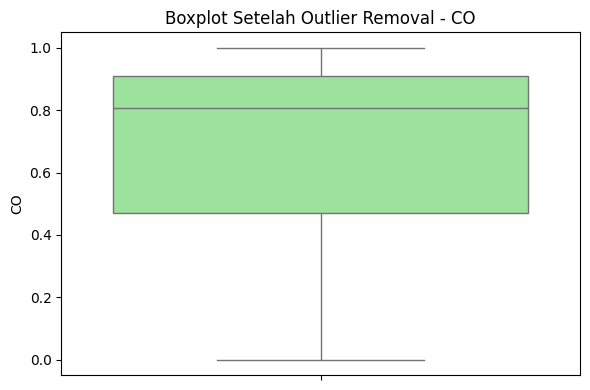

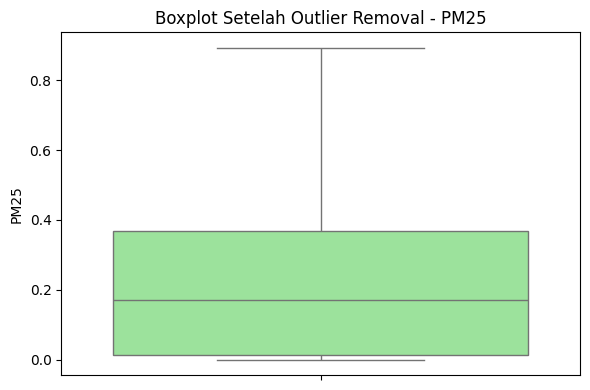

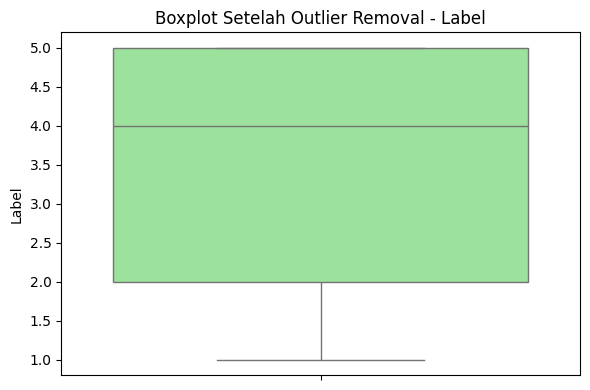

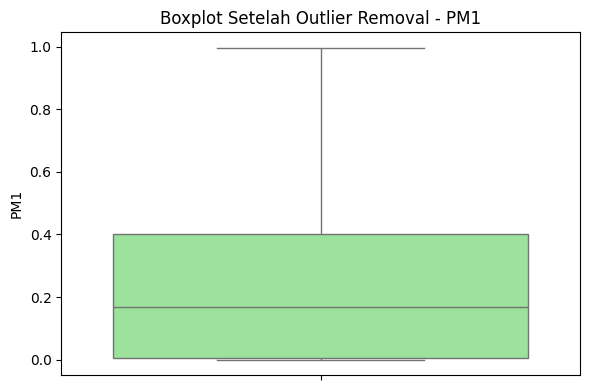

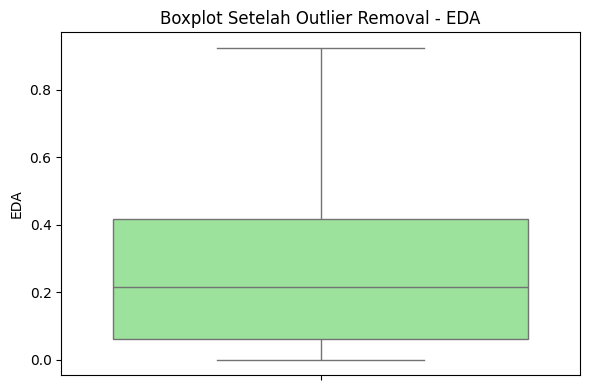

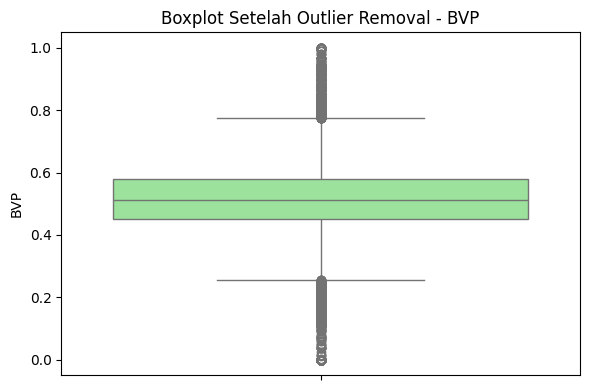

In [16]:
# # Visualisasi boxplot setelah outlier removal
# plt.figure(figsize=(15, 8))
# sns.boxplot(data=df[numeric_cols])
# plt.xticks(rotation=90)
# plt.title("Boxplot Setelah Outlier Removal")
# plt.show()
print("\n📊 Boxplot Setelah Outlier Removal")
for col in df:
    plt.figure(figsize=(6, 4))
    sns.boxplot(y=df[col], color='lightgreen')
    plt.title(f"Boxplot Setelah Outlier Removal - {col}")
    plt.tight_layout()
    plt.show()

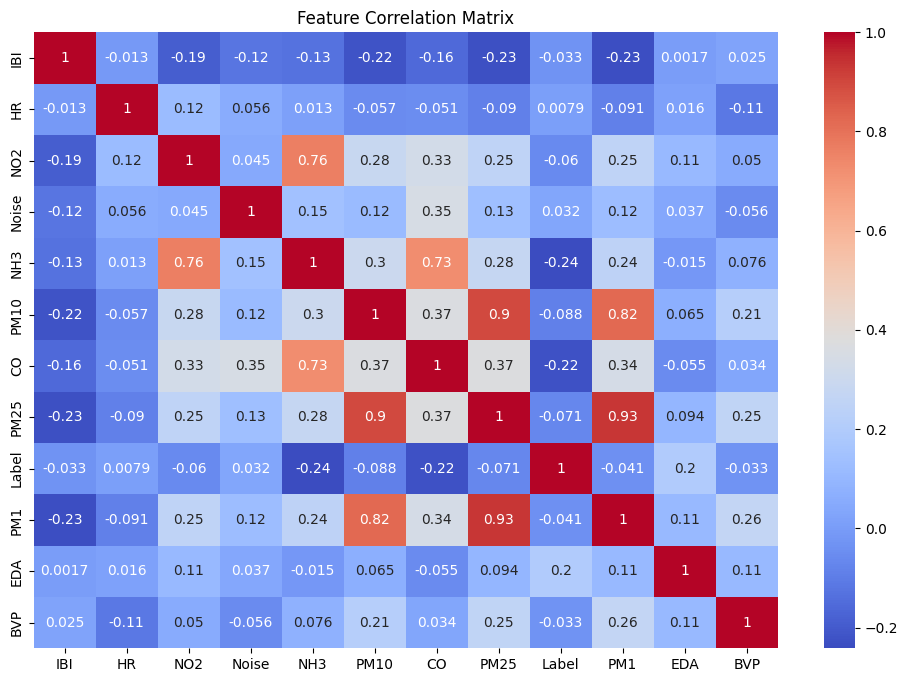

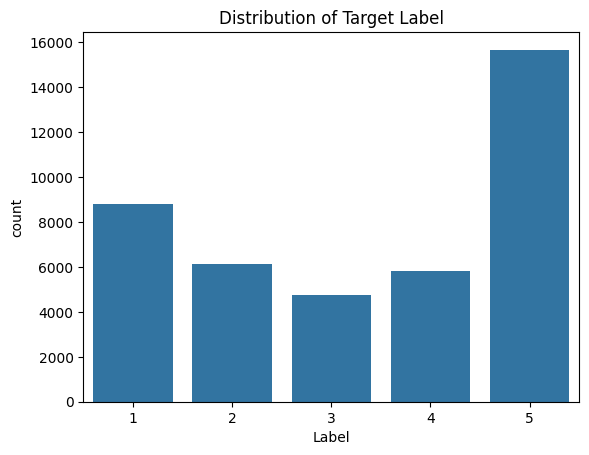

In [17]:
# Heatmap korelasi
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation Matrix")
plt.show()

# Distribusi Label
sns.countplot(x='Label', data=df)
plt.title("Distribution of Target Label")
plt.show()

In [18]:
# Memisahkan fitur (X) dan label (y)
X = df.drop('Label', axis=1)
y = df['Label']

print("Shape of features (X):", X.shape)
print("Shape of target (y):", y.shape)

Shape of features (X): (41189, 11)
Shape of target (y): (41189,)


### Numeric Feature Normalization

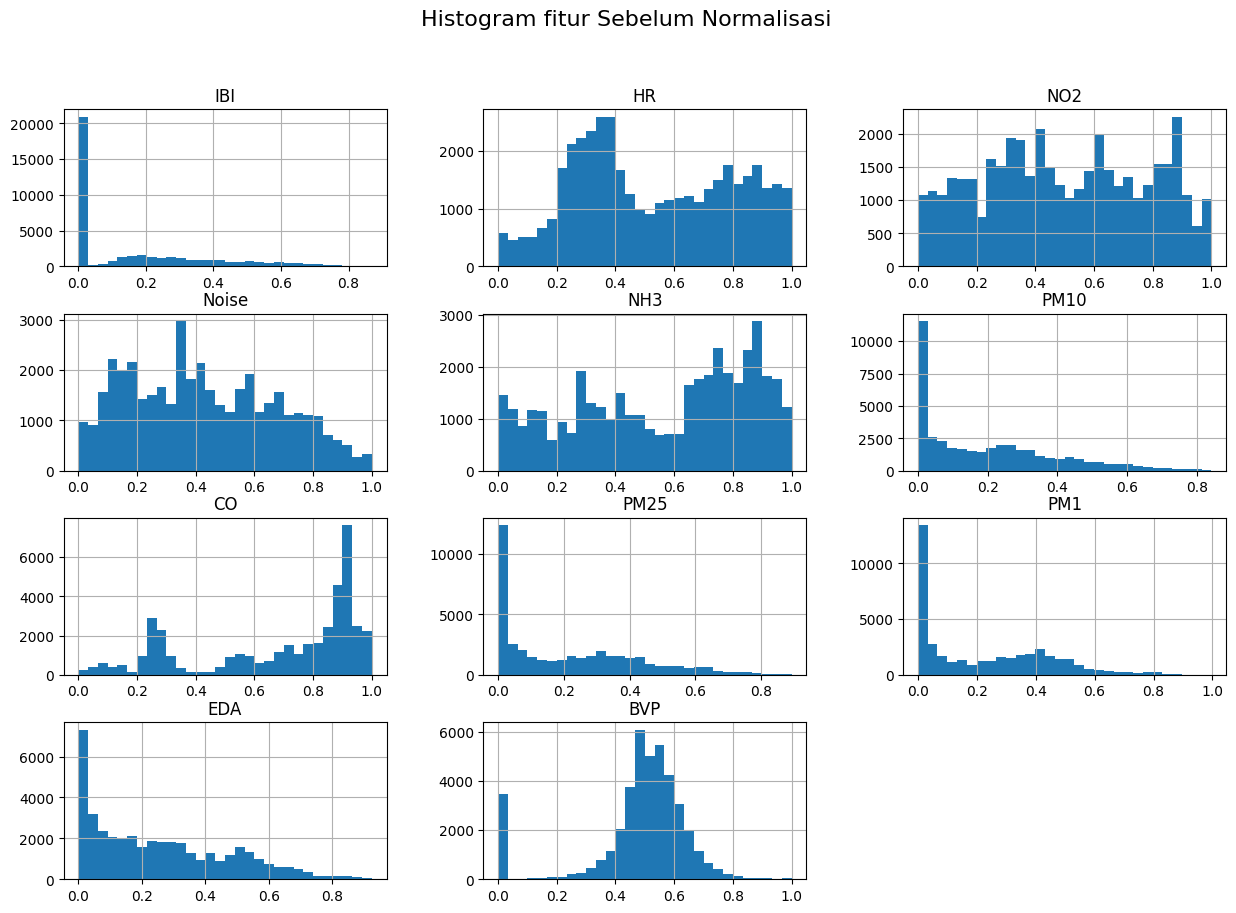

In [19]:
# Histogram sebelum normalisasi
X.hist(bins=30, figsize=(15, 10))
plt.suptitle("Histogram fitur Sebelum Normalisasi", fontsize=16)
plt.show()

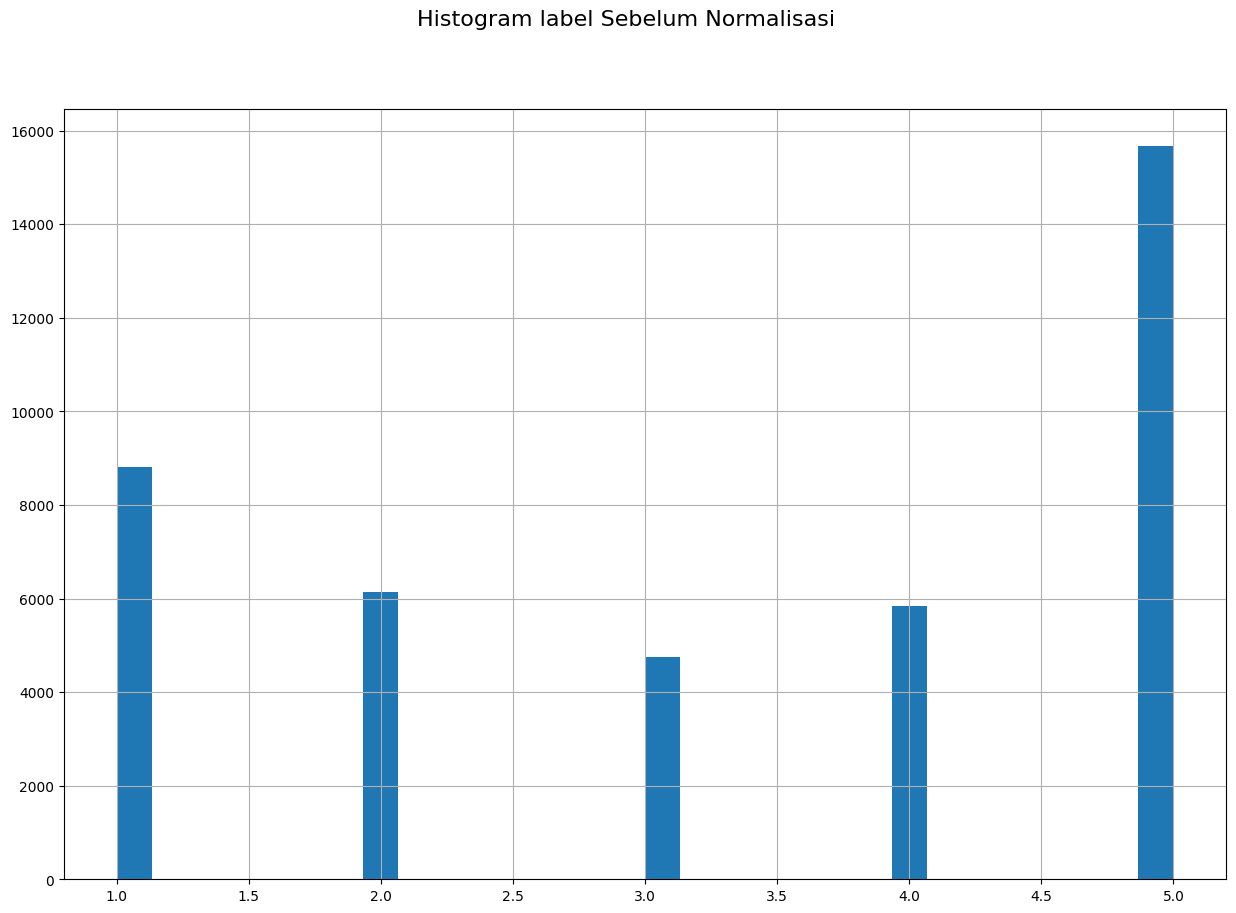

In [20]:
# histogram label
y.hist(bins=30, figsize=(15, 10))
plt.suptitle("Histogram label Sebelum Normalisasi", fontsize=16)
plt.show()

In [21]:
from sklearn.model_selection import train_test_split
# Split data menjadi 80% data train dan 20% data test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [22]:
num_cols = df.select_dtypes(include=np.number).columns.tolist()

# Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(f"Data Train after normalisation = {X_train_scaled.shape}")
print(f"Data Test after normalisation = {X_test_scaled.shape}")

Data Train after normalisation = (32951, 11)
Data Test after normalisation = (8238, 11)


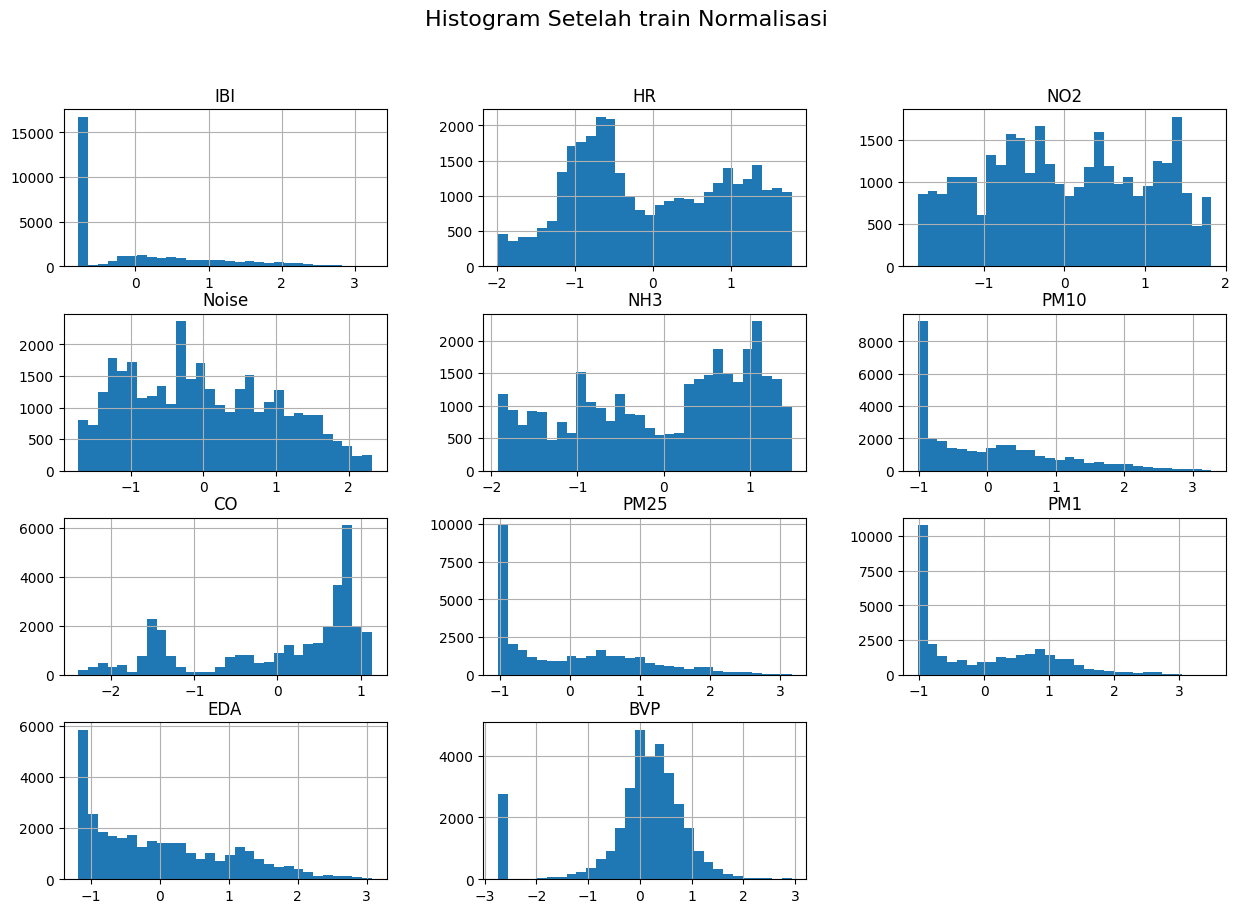

In [23]:
# Histogram setelah normalisasi
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_train_scaled_df.hist(bins=30, figsize=(15, 10))
plt.suptitle("Histogram Setelah train Normalisasi", fontsize=16)
plt.show()

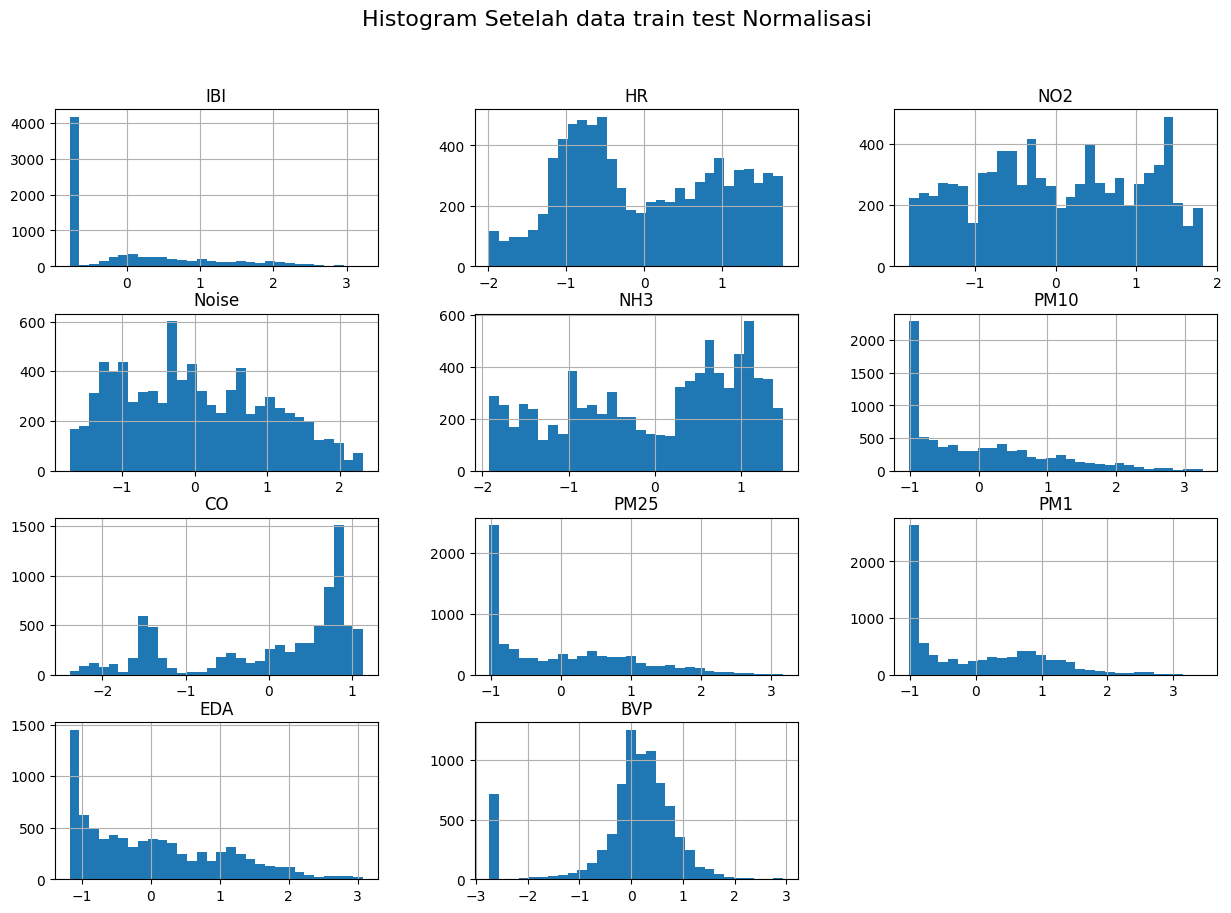

In [24]:
# Histogram setelah normalisasi
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=X_test.columns)
X_test_scaled_df.hist(bins=30, figsize=(15, 10))
plt.suptitle("Histogram Setelah data train test Normalisasi", fontsize=16)
plt.show()

## Principal Component Analysis (PCA)

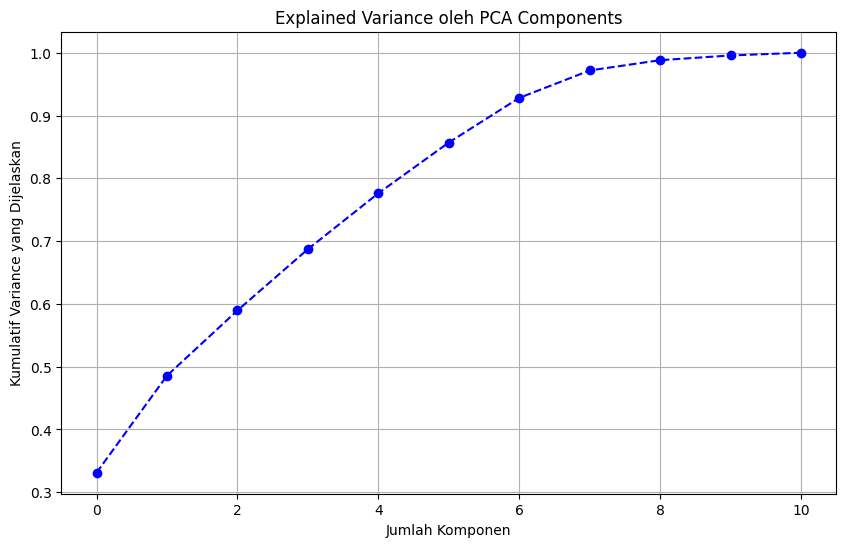

In [25]:
# Inisialisasi PCA tanpa mengurangi dimensi dulu (hanya untuk melihat explained variance)
pca = PCA(n_components=None) # Set n_components to None to keep all components initially
pca.fit(X_train_scaled)

# Plot explained variance ratio
plt.figure(figsize=(10, 6))
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o', linestyle='--', color='b')
plt.xlabel('Jumlah Komponen')
plt.ylabel('Kumulatif Variance yang Dijelaskan')
plt.title('Explained Variance oleh PCA Components')
plt.grid(True)
plt.show()

In [26]:
# Tampilkan variansi kumulatif
explained_variance = np.cumsum(pca.explained_variance_ratio_)
for i, var in enumerate(explained_variance):
    print(f"Komponen ke-{i+1}: {var:.4f} variance terjelaskan")

# Misal ingin menyimpan komponen yang menjelaskan >=90% variance
n_components = np.argmax(explained_variance >= 0.90) + 1
print(f"\n🔍 Jumlah komponen optimal (≥90% variance): {n_components}")

Komponen ke-1: 0.3311 variance terjelaskan
Komponen ke-2: 0.4856 variance terjelaskan
Komponen ke-3: 0.5895 variance terjelaskan
Komponen ke-4: 0.6871 variance terjelaskan
Komponen ke-5: 0.7761 variance terjelaskan
Komponen ke-6: 0.8569 variance terjelaskan
Komponen ke-7: 0.9280 variance terjelaskan
Komponen ke-8: 0.9717 variance terjelaskan
Komponen ke-9: 0.9881 variance terjelaskan
Komponen ke-10: 0.9956 variance terjelaskan
Komponen ke-11: 1.0000 variance terjelaskan

🔍 Jumlah komponen optimal (≥90% variance): 7


In [27]:
# Terapkan PCA dengan komponen optimal
pca_opt = PCA(n_components=n_components)
df_pca = pca_opt.fit_transform(df[num_cols])

# Konversi kembali ke DataFrame dan beri nama kolom
df_pca = pd.DataFrame(df_pca, columns=[f"PC{i+1}" for i in range(n_components)])


In [28]:
# from sklearn.model_selection import train_test_split
# # Split data menjadi 80% data train dan 20% data test
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# num_cols = df.select_dtypes(include=np.number).columns.tolist()

# # Scaling
# scaler = StandardScaler()
# X_train_scaled = scaler.fit_transform(X_train)
# X_test_scaled = scaler.transform(X_test)

# print(f"Data Train after normalisation = {X_train_scaled.shape}")
# print(f"Data Test after normalisation = {X_test_scaled.shape}")

# klassifikasi menggunakan non pca and non normalisasi

In [33]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# Inisialisasi model Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Melatih model
rf_model.fit(X_train, y_train)

# Memprediksi pada data test
y_pred = rf_model.predict(X_test)

# Evaluasi model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("\nClassification Report:")
print(report)


Classification Report:
              precision    recall  f1-score   support

           1       0.99      0.99      0.99      1758
           2       0.99      0.96      0.98      1224
           3       0.97      0.98      0.97       928
           4       0.98      0.97      0.98      1141
           5       0.98      0.99      0.99      3187

    accuracy                           0.98      8238
   macro avg       0.98      0.98      0.98      8238
weighted avg       0.98      0.98      0.98      8238



In [30]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score

# Inisialisasi model Decision Tree
dt_model = DecisionTreeClassifier(random_state=42)

# Melatih model menggunakan data training yang sudah di-scale
dt_model.fit(X_train, y_train)

# Memprediksi pada data test yang sudah di-scale
y_pred_dt = dt_model.predict(X_test)

# Evaluasi model Decision Tree
accuracy_dt = accuracy_score(y_test, y_pred_dt)
report_dt = classification_report(y_test, y_pred_dt)

print("\nClassification Report (Decision Tree):")
print(report_dt)

Akurasi Model Decision Tree (tanpa PCA): 0.9717

Classification Report (Decision Tree):
              precision    recall  f1-score   support

           1       0.98      0.98      0.98      1758
           2       0.96      0.96      0.96      1224
           3       0.96      0.96      0.96       928
           4       0.97      0.96      0.96      1141
           5       0.98      0.98      0.98      3187

    accuracy                           0.97      8238
   macro avg       0.97      0.97      0.97      8238
weighted avg       0.97      0.97      0.97      8238



In [34]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, accuracy_score

# Inisialisasi model KNN
knn_model = KNeighborsClassifier(n_neighbors=5) # You can adjust n_neighbors

# Melatih model KNN menggunakan data training yang sudah di-scale
print("Training KNN model...")
knn_model.fit(X_train, y_train)
print("Training complete.")

# Memprediksi pada data test yang sudah di-scale
y_pred_knn = knn_model.predict(X_test)

# Evaluasi model KNN
accuracy_knn = accuracy_score(y_test, y_pred_knn)
report_knn = classification_report(y_test, y_pred_knn)


print("\nClassification Report (KNN):")
print(report_knn)


Training KNN model...
Training complete.

Classification Report (KNN):
              precision    recall  f1-score   support

           1       0.96      0.97      0.96      1758
           2       0.95      0.93      0.94      1224
           3       0.91      0.91      0.91       928
           4       0.92      0.94      0.93      1141
           5       0.98      0.98      0.98      3187

    accuracy                           0.96      8238
   macro avg       0.94      0.94      0.94      8238
weighted avg       0.96      0.96      0.96      8238



In [35]:

# Inisialisasi model Naive Bayes (Gaussian)
gnb_model = GaussianNB()

# Melatih model Naive Bayes menggunakan data training yang sudah di-scale
print("\nTraining Naive Bayes model...")
gnb_model.fit(X_train, y_train)
print("Training complete.")

# Memprediksi pada data test yang sudah di-scale
y_pred_gnb = gnb_model.predict(X_test)

# Evaluasi model Naive Bayes
accuracy_gnb = accuracy_score(y_test, y_pred_gnb)
report_gnb = classification_report(y_test, y_pred_gnb)


print("\nClassification Report (Naive Bayes):")
print(report_gnb)


Training Naive Bayes model...
Training complete.

Classification Report (Naive Bayes):
              precision    recall  f1-score   support

           1       0.37      0.66      0.48      1758
           2       0.41      0.61      0.49      1224
           3       0.16      0.03      0.06       928
           4       0.29      0.19      0.23      1141
           5       0.55      0.41      0.47      3187

    accuracy                           0.42      8238
   macro avg       0.36      0.38      0.34      8238
weighted avg       0.41      0.42      0.39      8238



# klassifikasi menggunakan non pca and normalisasi

In [36]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# Inisialisasi model Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Melatih model
rf_model.fit(X_train_scaled, y_train)

# Memprediksi pada data test
y_pred = rf_model.predict(X_test_scaled)

# Evaluasi model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("\nClassification Report:")
print(report)


Classification Report:
              precision    recall  f1-score   support

           1       0.99      0.99      0.99      1758
           2       0.99      0.97      0.98      1224
           3       0.97      0.97      0.97       928
           4       0.98      0.97      0.98      1141
           5       0.98      0.99      0.99      3187

    accuracy                           0.98      8238
   macro avg       0.98      0.98      0.98      8238
weighted avg       0.98      0.98      0.98      8238



In [37]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score

# Inisialisasi model Decision Tree
dt_model = DecisionTreeClassifier(random_state=42)

# Melatih model menggunakan data training yang sudah di-scale
dt_model.fit(X_train_scaled, y_train)

# Memprediksi pada data test yang sudah di-scale
y_pred_dt = dt_model.predict(X_test_scaled)

# Evaluasi model Decision Tree
accuracy_dt = accuracy_score(y_test, y_pred_dt)
report_dt = classification_report(y_test, y_pred_dt)

print("\nClassification Report (Decision Tree):")
print(report_dt)


Classification Report (Decision Tree):
              precision    recall  f1-score   support

           1       0.98      0.98      0.98      1758
           2       0.96      0.96      0.96      1224
           3       0.96      0.96      0.96       928
           4       0.97      0.96      0.96      1141
           5       0.98      0.98      0.98      3187

    accuracy                           0.97      8238
   macro avg       0.97      0.97      0.97      8238
weighted avg       0.97      0.97      0.97      8238



In [38]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, accuracy_score

# Inisialisasi model KNN
knn_model = KNeighborsClassifier(n_neighbors=5) # You can adjust n_neighbors

# Melatih model KNN menggunakan data training yang sudah di-scale
print("Training KNN model...")
knn_model.fit(X_train_scaled, y_train)
print("Training complete.")

# Memprediksi pada data test yang sudah di-scale
y_pred_knn = knn_model.predict(X_test_scaled)

# Evaluasi model KNN
accuracy_knn = accuracy_score(y_test, y_pred_knn)
report_knn = classification_report(y_test, y_pred_knn)


print("\nClassification Report (KNN):")
print(report_knn)


Training KNN model...
Training complete.

Classification Report (KNN):
              precision    recall  f1-score   support

           1       0.95      0.96      0.96      1758
           2       0.93      0.92      0.93      1224
           3       0.91      0.90      0.90       928
           4       0.92      0.93      0.92      1141
           5       0.98      0.97      0.97      3187

    accuracy                           0.95      8238
   macro avg       0.94      0.94      0.94      8238
weighted avg       0.95      0.95      0.95      8238



In [39]:

# Inisialisasi model Naive Bayes (Gaussian)
gnb_model = GaussianNB()

# Melatih model Naive Bayes menggunakan data training yang sudah di-scale
print("\nTraining Naive Bayes model...")
gnb_model.fit(X_train_scaled, y_train)
print("Training complete.")

# Memprediksi pada data test yang sudah di-scale
y_pred_gnb = gnb_model.predict(X_test_scaled)

# Evaluasi model Naive Bayes
accuracy_gnb = accuracy_score(y_test, y_pred_gnb)
report_gnb = classification_report(y_test, y_pred_gnb)


print("\nClassification Report (Naive Bayes):")
print(report_gnb)


Training Naive Bayes model...
Training complete.

Classification Report (Naive Bayes):
              precision    recall  f1-score   support

           1       0.37      0.66      0.48      1758
           2       0.41      0.61      0.49      1224
           3       0.16      0.03      0.06       928
           4       0.29      0.19      0.23      1141
           5       0.55      0.41      0.47      3187

    accuracy                           0.42      8238
   macro avg       0.36      0.38      0.34      8238
weighted avg       0.41      0.42      0.39      8238



# klassifikasi menggunakan pca 7

In [40]:
from sklearn.decomposition import PCA

# Inisialisasi PCA dengan 7 komponen
pca = PCA(n_components=7)

# Fit hanya di data train
X_train_pca = pca.fit_transform(X_train_scaled)

# Transform data test pakai PCA yang sudah fit dari train
X_test_pca = pca.transform(X_test_scaled)

print("Shape train PCA:", X_train_pca.shape)
print("Shape test PCA:", X_test_pca.shape)


Shape train PCA: (32951, 7)
Shape test PCA: (8238, 7)


In [41]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Inisialisasi model
rf_model = RandomForestClassifier(random_state=42)

# Latih dengan data hasil PCA
rf_model.fit(X_train_pca, y_train)

# Prediksi
y_pred_pca = rf_model.predict(X_test_pca)

# Evaluasi
print("Accuracy:", accuracy_score(y_test, y_pred_pca))
print(classification_report(y_test, y_pred_pca))


Accuracy: 0.9530225782957028
              precision    recall  f1-score   support

           1       0.96      0.96      0.96      1758
           2       0.97      0.93      0.95      1224
           3       0.94      0.93      0.93       928
           4       0.95      0.91      0.93      1141
           5       0.95      0.98      0.96      3187

    accuracy                           0.95      8238
   macro avg       0.95      0.94      0.95      8238
weighted avg       0.95      0.95      0.95      8238



In [44]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score

# Inisialisasi model Decision Tree
dt_model = DecisionTreeClassifier(random_state=42)

# Melatih model menggunakan data training yang sudah di-scale
dt_model.fit(X_train_pca, y_train)

# Memprediksi pada data test yang sudah di-scale
y_pred_dt = dt_model.predict(X_test_pca)

# Evaluasi model Decision Tree
accuracy_dt = accuracy_score(y_test, y_pred_dt)
report_dt = classification_report(y_test, y_pred_dt)

print("Accuracy:", accuracy_score(y_test, y_pred_pca))
print(classification_report(y_test, y_pred_pca))

Accuracy: 0.9530225782957028
              precision    recall  f1-score   support

           1       0.96      0.96      0.96      1758
           2       0.97      0.93      0.95      1224
           3       0.94      0.93      0.93       928
           4       0.95      0.91      0.93      1141
           5       0.95      0.98      0.96      3187

    accuracy                           0.95      8238
   macro avg       0.95      0.94      0.95      8238
weighted avg       0.95      0.95      0.95      8238



In [43]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, accuracy_score

# Inisialisasi model KNN
knn_model = KNeighborsClassifier(n_neighbors=5) # You can adjust n_neighbors

# Melatih model KNN menggunakan data training yang sudah di-scale
print("Training KNN model...")
knn_model.fit(X_train_pca, y_train)
print("Training complete.")

# Memprediksi pada data test yang sudah di-scale
y_pred_knn = knn_model.predict(X_test_pca)

# Evaluasi model KNN
accuracy_knn = accuracy_score(y_test, y_pred_knn)
report_knn = classification_report(y_test, y_pred_knn)

print("Accuracy:", accuracy_score(y_test, y_pred_pca))
print(classification_report(y_test, y_pred_pca))


Training KNN model...
Training complete.
Accuracy: 0.9530225782957028
              precision    recall  f1-score   support

           1       0.96      0.96      0.96      1758
           2       0.97      0.93      0.95      1224
           3       0.94      0.93      0.93       928
           4       0.95      0.91      0.93      1141
           5       0.95      0.98      0.96      3187

    accuracy                           0.95      8238
   macro avg       0.95      0.94      0.95      8238
weighted avg       0.95      0.95      0.95      8238



In [42]:

# Inisialisasi model Naive Bayes (Gaussian)
gnb_model = GaussianNB()

# Melatih model Naive Bayes menggunakan data training yang sudah di-scale
print("\nTraining Naive Bayes model...")
gnb_model.fit(X_train_pca, y_train)
print("Training complete.")

# Memprediksi pada data test yang sudah di-scale
y_pred_gnb = gnb_model.predict(X_test_pca)

# Evaluasi model Naive Bayes
accuracy_gnb = accuracy_score(y_test, y_pred_gnb)
report_gnb = classification_report(y_test, y_pred_gnb)


print("\nClassification Report (Naive Bayes):")
print(report_gnb)


Training Naive Bayes model...
Training complete.

Classification Report (Naive Bayes):
              precision    recall  f1-score   support

           1       0.47      0.61      0.53      1758
           2       0.56      0.44      0.49      1224
           3       0.41      0.12      0.18       928
           4       0.40      0.10      0.17      1141
           5       0.48      0.66      0.56      3187

    accuracy                           0.48      8238
   macro avg       0.46      0.39      0.38      8238
weighted avg       0.47      0.48      0.44      8238

